In [2]:
import matplotlib.pyplot as plt #  for plotting
import seaborn as sns # for interactive plotting with colors /used for plot interactive graph. I like it most for plot
import numpy as np # for numerical calculation
import pandas as pd # for data manipulation,data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # to split arrays or matrices into random train and test subsets
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler # Transform features by scaling each feature to a given range.
from sklearn.preprocessing import LabelEncoder # Encode categorical features 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , plot_confusion_matrix
from sklearn.compose import ColumnTransformer # Applies transformers to columns of an array or pandas DataFrame
import pickle # Pickle is used for serializing and de-serializing a Python object structure
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

### Load Dataset

In [3]:
data = pd.read_excel("final_with_updated_claim_flag_synthetic_insurance_claim_data.xlsx")

In [4]:
data.head()

,months_as_customer,age,policy_bind_date,time_difference,fraud_reported,claim_type,total_claim_amount,insured_sex,insured_education_level,policy_annual_premium,umbrella_limit,vehicle_claim,time_since_policy_activation,claim_frequency,claim_size_ratio,claim_type_frequency,average_claim_amount_last_12_months,claim_flag,incidentDate
0,114,77,2016-07-30,3,yes,vehicle_claim,6282,FEMALE,PhD,2110,5896799,6623,105,0,2.977251,175,16994,0,2018-12-08
1,63,61,2018-02-08,59,no,property_claim,23141,MALE,High School,3988,9466685,14908,92,4,5.802658,174,16010,0,2020-12-19
2,104,61,2016-01-20,50,no,property_claim,19292,FEMALE,Bachelors,2954,8479816,17858,88,3,6.530806,174,11858,0,2016-05-21
3,26,22,2018-10-14,12,yes,injury_claim,49992,FEMALE,High School,4994,7007509,4460,59,4,10.010412,151,20620,1,2020-01-24
4,118,56,2015-05-09,1,yes,property_claim,36085,MALE,PhD,2446,5445818,13986,72,2,14.752657,174,11437,1,2016-04-04


In [5]:
data.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'time_difference',
       'fraud_reported', 'claim_type', 'total_claim_amount', 'insured_sex',
       'insured_education_level', 'policy_annual_premium', 'umbrella_limit',
       'vehicle_claim', 'time_since_policy_activation', 'claim_frequency',
       'claim_size_ratio', 'claim_type_frequency',
       'average_claim_amount_last_12_months', 'claim_flag', 'incidentDate'],
      dtype='object')

## 2.Data Understanding

In [6]:
#previewing the dimensions or shape (rows and columns)of the data

data.shape

(500, 19)

In [7]:
#previewing the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   months_as_customer                   500 non-null    int64         
 1   age                                  500 non-null    int64         
 2   policy_bind_date                     500 non-null    datetime64[ns]
 3   time_difference                      500 non-null    int64         
 4   fraud_reported                       500 non-null    object        
 5   claim_type                           500 non-null    object        
 6   total_claim_amount                   500 non-null    int64         
 7   insured_sex                          500 non-null    object        
 8   insured_education_level              500 non-null    object        
 9   policy_annual_premium                500 non-null    int64         
 10  umbrella_limit

In [8]:
#Checking for duplicate values

data.duplicated().sum()

0

In [9]:
#previewing the summary numerical statistics of our data

data.describe()

,months_as_customer,age,policy_bind_date,time_difference,total_claim_amount,policy_annual_premium,umbrella_limit,vehicle_claim,time_since_policy_activation,claim_frequency,claim_size_ratio,claim_type_frequency,average_claim_amount_last_12_months,claim_flag,incidentDate
count,500.000000,500.000000,500,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500
mean,65.738000,49.862000,2019-05-12 03:01:26.399999744,30.140000,26244.710000,2897.656000,5.562912e+06,10258.098000,60.240000,2.22000,12.620315,167.404000,15354.868000,0.554000,2020-12-18 05:42:43.199999744
min,12.000000,18.000000,2013-01-15 00:00:00,1.000000,661.000000,507.000000,1.004138e+06,67.000000,1.000000,0.00000,0.148406,151.000000,514.000000,0.000000,2013-01-29 00:00:00
25%,38.000000,34.000000,2016-05-26 18:00:00,14.000000,14552.500000,1807.750000,3.185432e+06,4978.750000,32.000000,1.00000,5.232060,151.000000,7724.250000,0.000000,2017-11-27 00:00:00
50%,65.000000,50.000000,2019-10-27 00:00:00,30.000000,27093.500000,2991.500000,5.706212e+06,10863.000000,60.500000,2.00000,9.031550,174.000000,15383.000000,1.000000,2021-05-19 12:00:00
75%,97.000000,66.000000,2022-02-15 18:00:00,45.000000,37356.250000,4075.250000,7.688139e+06,15028.250000,89.000000,3.00000,14.396670,175.000000,22798.750000,1.000000,2023-10-17 00:00:00
max,120.000000,80.000000,2024-12-31 00:00:00,60.000000,49992.000000,5000.000000,9.990499e+06,19942.000000,119.000000,4.00000,79.000000,175.000000,29931.000000,1.000000,2027-12-13 00:00:00
std,32.035698,18.310366,NaN,17.459383,13669.237855,1274.521244,2.588252e+06,5913.965063,34.090214,1.39409,12.617154,10.808999,8602.642997,0.497573,NaN


In [10]:
#previewing both numerical and categorical statistics

data.describe(include="all")

,months_as_customer,age,policy_bind_date,time_difference,fraud_reported,claim_type,total_claim_amount,insured_sex,insured_education_level,policy_annual_premium,umbrella_limit,vehicle_claim,time_since_policy_activation,claim_frequency,claim_size_ratio,claim_type_frequency,average_claim_amount_last_12_months,claim_flag,incidentDate
count,500.000000,500.000000,500,500.000000,500,500,500.000000,500,500,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500
unique,NaN,NaN,NaN,NaN,2,3,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,yes,vehicle_claim,NaN,FEMALE,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,306,175,NaN,264,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,65.738000,49.862000,2019-05-12 03:01:26.399999744,30.140000,NaN,NaN,26244.710000,NaN,NaN,2897.656000,5.562912e+06,10258.098000,60.240000,2.22000,12.620315,167.404000,15354.868000,0.554000,2020-12-18 05:42:43.199999744
min,12.000000,18.000000,2013-01-15 00:00:00,1.000000,NaN,NaN,661.000000,NaN,NaN,507.000000,1.004138e+06,67.000000,1.000000,0.00000,0.148406,151.000000,514.000000,0.000000,2013-01-29 00:00:00
25%,38.000000,34.000000,2016-05-26 18:00:00,14.000000,NaN,NaN,14552.500000,NaN,NaN,1807.750000,3.185432e+06,4978.750000,32.000000,1.00000,5.232060,151.000000,7724.250000,0.000000,2017-11-27 00:00:00
50%,65.000000,50.000000,2019-10-27 00:00:00,30.000000,NaN,NaN,27093.500000,NaN,NaN,2991.500000,5.706212e+06,10863.000000,60.500000,2.00000,9.031550,174.000000,15383.000000,1.000000,2021-05-19 12:00:00
75%,97.000000,66.000000,2022-02-15 18:00:00,45.000000,NaN,NaN,37356.250000,NaN,NaN,4075.250000,7.688139e+06,15028.250000,89.000000,3.00000,14.396670,175.000000,22798.750000,1.000000,2023-10-17 00:00:00
max,120.000000,80.000000,2024-12-31 00:00:00,60.000000,NaN,NaN,49992.000000,NaN,NaN,5000.000000,9.990499e+06,19942.000000,119.000000,4.00000,79.000000,175.000000,29931.000000,1.000000,2027-12-13 00:00:00


## 3. Data Visualization

<Axes: >

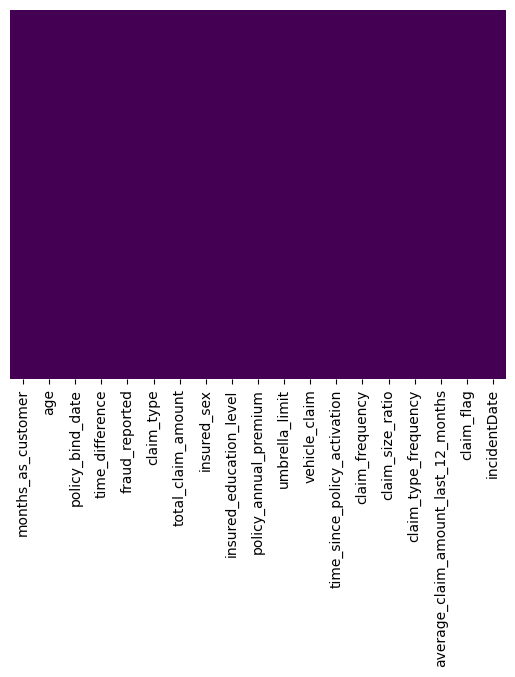

In [11]:
#Checking for missing values in our data

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### fraud_reported

<Axes: xlabel='fraud_reported', ylabel='count'>

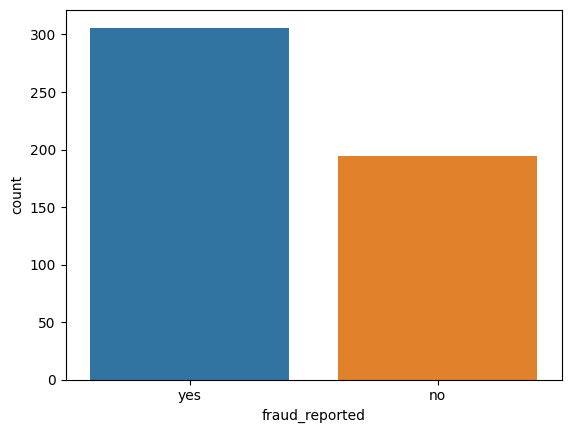

In [20]:
sns.countplot(data=data,x='fraud_reported')

#### claim_type

<Axes: xlabel='claim_type', ylabel='count'>

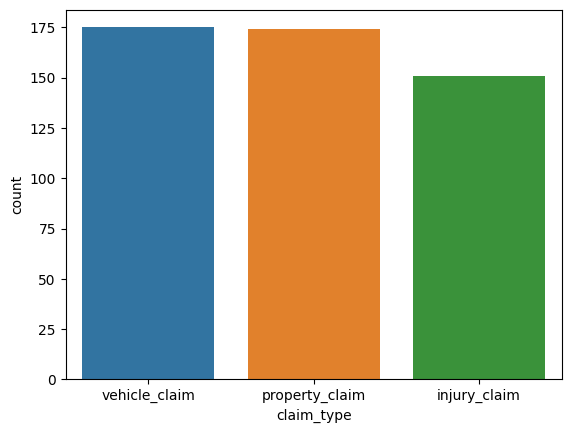

In [21]:
sns.countplot(data=data,x='claim_type')

#### insured_sex

<Axes: xlabel='insured_sex', ylabel='count'>

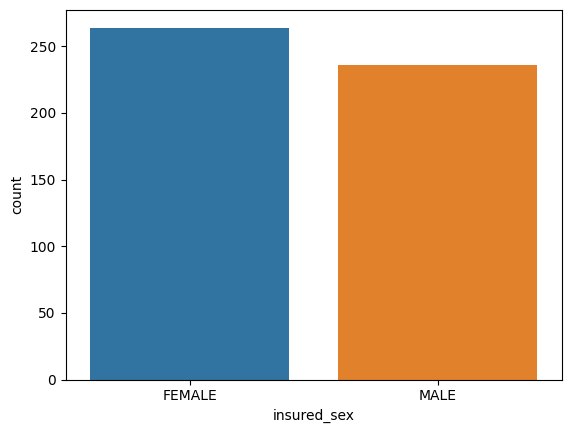

In [24]:
sns.countplot(data=data,x='insured_sex')

#### insured_education_level

<Axes: xlabel='insured_education_level', ylabel='count'>

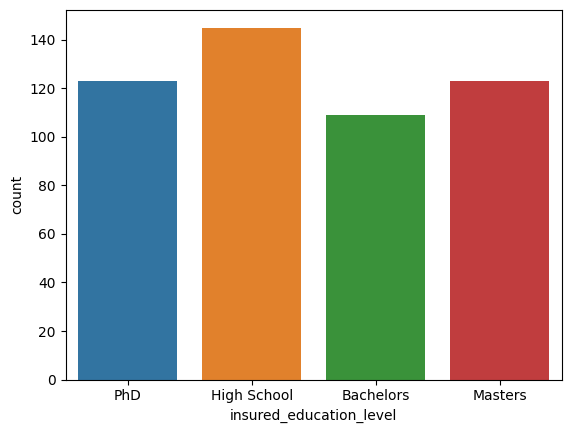

In [25]:
sns.countplot(data=data,x='insured_education_level')

## 4.Data Preproccessing and Feature Engineering

In [13]:
#Rename fraud_reported to target

data.rename(columns = {'fraud_reported':'target' }, inplace=True)

In [14]:
df = data

### Handling datetime

In [15]:

# First, make sure the columns are datetime
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incidentDate'] = pd.to_datetime(df['incidentDate'])

# Policy Bind Date Features
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_dayofweek'] = df['policy_bind_date'].dt.dayofweek
df['policy_bind_is_weekend'] = df['policy_bind_dayofweek'] >= 5
df['policy_bind_quarter'] = df['policy_bind_date'].dt.quarter

# Incident Date Features
df['incident_year'] = df['incidentDate'].dt.year
df['incident_month'] = df['incidentDate'].dt.month
df['incident_day'] = df['incidentDate'].dt.day
df['incident_dayofweek'] = df['incidentDate'].dt.dayofweek
df['incident_is_weekend'] = df['incident_dayofweek'] >= 5
df['incident_quarter'] = df['incidentDate'].dt.quarter

# Time Difference Feature (VERY important for fraud detection)
df['days_between_policy_and_incident'] = (df['incidentDate'] - df['policy_bind_date']).dt.days

# Remove datetime
df = df.drop('policy_bind_date' , axis=1)
df = df.drop('incidentDate' , axis=1)


### Encoding categorical values to numerical values

In [16]:
#Instantiation

le=LabelEncoder()

In [17]:
df['target'] = le.fit_transform(df['target'])
df['claim_type'] = le.fit_transform(df['claim_type'])
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['insured_education_level']  = le.fit_transform(df['insured_education_level'])
df['incident_is_weekend']  = le.fit_transform(df['incident_is_weekend'])
df['policy_bind_is_weekend']  = le.fit_transform(df['policy_bind_is_weekend'])

### Scale Features

In [20]:
# scaling the features

class inputScaler( BaseEstimator, TransformerMixin):
   
    def __init__(self, feat_to_scale = ['months_as_customer','age','months_as_customer','time_difference','total_claim_amount','policy_annual_premium',
                                        'umbrella_limit','vehicle_claim','time_since_policy_activation',"claim_size_ratio", "claim_type_frequency",
                                       "average_claim_amount_last_12_months"]):
        self.feat_to_scale = feat_to_scale
        
    def fit(self,data):
        return self
    
    def transform(self, data):
        if (set(self.feat_to_scale).issubset(data.columns)):
            min_max_scaler = MinMaxScaler()
            data[self.feat_to_scale] = min_max_scaler.fit_transform(data[self.feat_to_scale])
            return data
        else:
            print("One or more features are not in the dataframe")
            return data
            

In [21]:
# calling the scaler transformer

scaler = inputScaler()

df = scaler.fit_transform(df)

In [22]:
df.shape

(500, 30)

### Defining predictor variables and target variable

In [23]:
#Dependent variable is also referred as target variable and the independent variables are called the predictors.

X = df.drop('target',axis=1)
y = df['target']

### Splitting data into train and test set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42,shuffle=True)

In [25]:
model = RandomForestClassifier(n_estimators=300) 

In [26]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [27]:
predictions = model.predict(X_test)

## 5.Evaluation

In [28]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 6 65]
 [ 7 87]]


              precision    recall  f1-score   support

           0       0.46      0.08      0.14        71
           1       0.57      0.93      0.71        94

    accuracy                           0.56       165
   macro avg       0.52      0.51      0.43       165
weighted avg       0.52      0.56      0.46       165



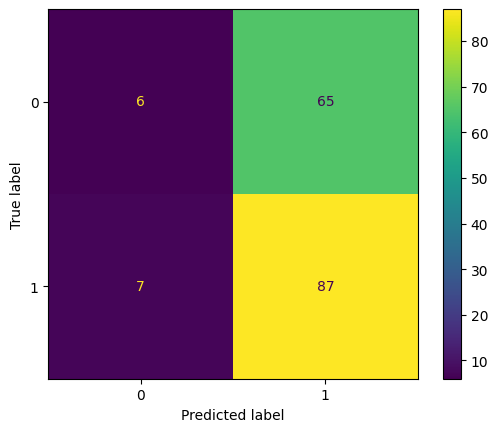

In [29]:
plot_confusion_matrix(model, X_test,y_test)

In [30]:
model.score(X_test, y_test)

0.5636363636363636

## 6.Deploying

In [31]:
# saving model

filename = 'claims_final.sav'
pickle.dump(model,open(filename,'wb'))

In [32]:
#Loading model

loaded_model = pickle.load(open(filename, 'rb'))


In [33]:
sample = df.sample()

sample


,months_as_customer,age,time_difference,target,claim_type,total_claim_amount,insured_sex,insured_education_level,policy_annual_premium,umbrella_limit,...,policy_bind_dayofweek,policy_bind_is_weekend,policy_bind_quarter,incident_year,incident_month,incident_day,incident_dayofweek,incident_is_weekend,incident_quarter,days_between_policy_and_incident
207,0.768519,0.774194,0.983051,1,0,0.45515,0,0,0.084353,0.651954,...,5,1,3,2020,2,18,1,0,1,878


In [34]:
#storing prediction in result variable

result = loaded_model.predict(sample.drop('target', axis = 1))



In [35]:
# 0 No
# 1 yes 

result[0]

1

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   months_as_customer                   500 non-null    float64
 1   age                                  500 non-null    float64
 2   time_difference                      500 non-null    float64
 3   target                               500 non-null    int32  
 4   claim_type                           500 non-null    int32  
 5   total_claim_amount                   500 non-null    float64
 6   insured_sex                          500 non-null    int32  
 7   insured_education_level              500 non-null    int32  
 8   policy_annual_premium                500 non-null    float64
 9   umbrella_limit                       500 non-null    float64
 10  vehicle_claim                        500 non-null    float64
 11  time_since_policy_activation    

In [37]:
df.columns

Index(['months_as_customer', 'age', 'time_difference', 'target', 'claim_type',
       'total_claim_amount', 'insured_sex', 'insured_education_level',
       'policy_annual_premium', 'umbrella_limit', 'vehicle_claim',
       'time_since_policy_activation', 'claim_frequency', 'claim_size_ratio',
       'claim_type_frequency', 'average_claim_amount_last_12_months',
       'claim_flag', 'policy_bind_year', 'policy_bind_month',
       'policy_bind_day', 'policy_bind_dayofweek', 'policy_bind_is_weekend',
       'policy_bind_quarter', 'incident_year', 'incident_month',
       'incident_day', 'incident_dayofweek', 'incident_is_weekend',
       'incident_quarter', 'days_between_policy_and_incident'],
      dtype='object')